# Capstone Project - The Battle of Neighborhoods (Week 1) : Visual Approach to Strategic Locations for distribution of masks and medical devices for treatment covid-19 based on many cases in 28th May and prediction charts based on most cases in May.

## Applied Data Science Capstone by IBM/Coursera

### Table of contents
1. Introduction: Business Problem
1. Data
1. Methodology
1. Results and Discussion
1. Conclusion

## Introduction: Business Problem 
Since the beginning of 2020, Jakarta, like hundreds (if not thousands) of other cities around the world is currently under attacked by invisible army called ‘Novel Corona Virus’, or also known as ‘Covid-19’. While every efforts have been focussed on to solving or minimizing problems at hands, other professionals such as Data Scientist may need to assess the current situations in the city, such as the availability, the number and the geographical distribution (i.e. location) of health infrastructures such as virus testing centers or ‘specialist’ hospital capable of handling and detecting such disease that standard hospitals cannot. This is due to the nature of the viral disease requiring a more sophisticated instruments, reagents, and assay technique and more importantly high-throughput sample analysis platforms. I would like to describe a simple analysis for determining strategic location for distribution of __masks and medical devices__ for treatment covid-19 based on many cases in 28th May and __prediction charts__ based on most cases in May.

## Data 
Based on definition of our problem, factors that will influence our decision are:
1. The data Covid-19 cases per district is sourced from ["Riwayat File Covid-19 DKI Jakarta"](https://drive.google.com/file/d/1w5ovPYjXREfd7lz9o3GwAUQuqcDYhCC5/view)
1. The data total population in DKI Jakarta 2020 is sourced from [statistik.jakarta.go.id](http://statistik.jakarta.go.id/berapa-kepadatan-penduduk-dki-jakarta-saat-ini/)
1. The data 10 most pupulation in DKI Jakarta 2020 per district is sourced from [statistik.jakarta.go.id](http://statistik.jakarta.go.id/berapa-kepadatan-penduduk-dki-jakarta-saat-ini/)
1. The data Hospital for treatment covid-19 is sourced from [megapolitan.kompas.com](https://megapolitan.kompas.com/read/2020/04/29/19325161/daftar-13-rumah-sakit-rujukan-covid-19-di-jakarta)


Following data sources will be needed to extract/generate the required information:
1. Process covid-19 positive case data collection on 28 May 2020 At 09.00.
1. The distribution of mask sales is based on the population in the DKI Jakarta area.
1. The distribution of mask sales is at most based on 5 districts with the most densely populated populations.
1. Creating new a datasets from Hospital table that contains city, district, along with their latitudes and longitudes.


## First, import the library to use.

### Import necessary libraries

In [4]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from bs4 import BeautifulSoup # library for web scrapping 

#!conda install -c conda-forge geocoder --yes
#print ("install geocoder")
#!conda install -c conda-forge/label/gcc7 geocoder --yes
#print ("install geocoder2")
#!conda install -c conda-forge/label/cf201901 geocoder --yes
#print ("install geocoder3")
#!conda install -c conda-forge/label/cf202003 geocoder --yes
#print ("install geocoder4")
import geocoder

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


### Define Foursquare Credentials and Version

Make sure that you have created a Foursquare developer account and have your credentials handy

In [5]:
CLIENT_ID = 'EZUCSVCTPAWJTAGVHIP2GM5LHRXH03D54VXUUPECMO2AAFQV' # your Foursquare ID
CLIENT_SECRET = 'KE4C1V0NGPXD5HTFDU34XHG0DPNNFVMK34EWOFLFBUU20QOQ' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EZUCSVCTPAWJTAGVHIP2GM5LHRXH03D54VXUUPECMO2AAFQV
CLIENT_SECRET:KE4C1V0NGPXD5HTFDU34XHG0DPNNFVMK34EWOFLFBUU20QOQ


## Data

### Read and show all data used.

Read and show data Covid-19 cases per district

In [142]:
# Read in the data Covid-19 cases per district (28 May,2020)
df_cases = pd.read_csv("https://raw.githubusercontent.com/cahyati/Coursera_Capstone/master/Standar%20Kelurahan%20Data%20Corona%20(28%20MEI%202020%20Pukul%2009.00).csv")
# View the top rows of the dataset
df_cases

,ID_KEL,ID_KEL.1,Nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,ODP,Proses Pemantauan,Selesai Pemantauan,PDP,Masih Dirawat,Pulang dan Sehat,POSITIF,Dirawat,Sembuh,Meninggal,Self Isolation,Keterangan
0,NaN,NaN,NaN,NaN,NaN,TOTAL,30704,746,29958,9577,1005,8572,6929,2055,1719,514,2641,0.0
1,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,3723,107,3616,2584,272,2312,539,149,26,8,356,NaN
2,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,5706,342,5364,1638,229,1409,1329,499,382,71,377,NaN
3,3173061005,3173061005,DKI JAKARTA,JAKARTA BARAT,KALI DERES,PEGADUNGAN,129,0,129,61,0,61,51,15,28,4,4,NaN
4,3174071006,3174071006,DKI JAKARTA,JAKARTA SELATAN,KEBAYORAN BARU,SENAYAN,7,0,7,13,0,13,17,0,16,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,3101021002,3101021002,DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SELATAN,PULAU TIDUNG,175,1,174,1,0,1,13,3,0,0,10,NaN
266,3173031008,3173031008,DKI JAKARTA,JAKARTA BARAT,TAMAN SARI,PINANGSIA,13,0,13,3,0,3,1,0,0,0,1,NaN
267,3174021001,3174021001,DKI JAKARTA,JAKARTA SELATAN,SETIA BUDI,SETIA BUDI,15,0,15,7,0,7,3,2,1,0,0,NaN
268,3173041001,3173041001,DKI JAKARTA,JAKARTA BARAT,TAMBORA,TAMBORA,21,0,21,7,4,3,2,0,0,0,2,NaN


Read and show 5 top data row from Covid-19 cases per district

In [143]:
df_cases.head()

,ID_KEL,ID_KEL.1,Nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,ODP,Proses Pemantauan,Selesai Pemantauan,PDP,Masih Dirawat,Pulang dan Sehat,POSITIF,Dirawat,Sembuh,Meninggal,Self Isolation,Keterangan
0,NaN,NaN,NaN,NaN,NaN,TOTAL,30704,746,29958,9577,1005,8572,6929,2055,1719,514,2641,0.0
1,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,3723,107,3616,2584,272,2312,539,149,26,8,356,NaN
2,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,5706,342,5364,1638,229,1409,1329,499,382,71,377,NaN
3,3173061005,3173061005,DKI JAKARTA,JAKARTA BARAT,KALI DERES,PEGADUNGAN,129,0,129,61,0,61,51,15,28,4,4,NaN
4,3174071006,3174071006,DKI JAKARTA,JAKARTA SELATAN,KEBAYORAN BARU,SENAYAN,7,0,7,13,0,13,17,0,16,0,1,NaN


Read and show 5 bottom data row from Covid-19 cases per district

In [144]:
df_cases.tail()

,ID_KEL,ID_KEL.1,Nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,ODP,Proses Pemantauan,Selesai Pemantauan,PDP,Masih Dirawat,Pulang dan Sehat,POSITIF,Dirawat,Sembuh,Meninggal,Self Isolation,Keterangan
265,3101021002,3101021002,DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SELATAN,PULAU TIDUNG,175,1,174,1,0,1,13,3,0,0,10,NaN
266,3173031008,3173031008,DKI JAKARTA,JAKARTA BARAT,TAMAN SARI,PINANGSIA,13,0,13,3,0,3,1,0,0,0,1,NaN
267,3174021001,3174021001,DKI JAKARTA,JAKARTA SELATAN,SETIA BUDI,SETIA BUDI,15,0,15,7,0,7,3,2,1,0,0,NaN
268,3173041001,3173041001,DKI JAKARTA,JAKARTA BARAT,TAMBORA,TAMBORA,21,0,21,7,4,3,2,0,0,0,2,NaN
269,3101021001,3101021001,DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SELATAN,PULAU UNTUNG JAWA,20,0,20,0,0,0,0,0,0,0,0,NaN


Read and show data total population in DKI Jakarta 2020

In [123]:
import pandas as pd
# Read in the data total population in DKI Jakarta 2020
df_population = pd.read_csv("https://raw.githubusercontent.com/cahyati/Coursera_Capstone/master/population2020_DKI_Jakarta.csv")
# View the top rows of the dataset
df_population

,City,Total population 2020(people/km²)
0,Jakarta Pusat,23877
1,Jakarta Barat,19592
2,Jakarta Timur,16924
3,Jakarta Selatan,16600
4,Jakarta Utara,12409
5,Kep. Seribu,3334


Total population in Jakarta

In [126]:
df_population.info()

# Get the number of total / confirmed POSITIVE cases in Jakarta per 28 May 2020
print ("Total Polulation :", df_population['Total population 2020(people/km²)'].sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   City                               6 non-null      object
 1   Total population 2020(people/km²)  6 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes
Total Polulation : 92736


Read and show 5 top data row from total population in DKI Jakarta 2020

In [127]:
df_population.head()

,City,Total population 2020(people/km²)
0,Jakarta Pusat,23877
1,Jakarta Barat,19592
2,Jakarta Timur,16924
3,Jakarta Selatan,16600
4,Jakarta Utara,12409


Read and show data from 10 district most pupulation in DKI Jakarta 2020

In [112]:
# Read in the data 10 most pupulation in DKI Jakarta 2020 per district
df_most_population = pd.read_csv("https://raw.githubusercontent.com/cahyati/Coursera_Capstone/master/10_kelurahan%20terpadat_DKI_Jakarta.csv")
# View the top rows of the dataset
df_most_population

,district,Total population 2020 (people/km²)
0,Kali_Anyar,95676
1,Kampung_Rawa,91441
2,Galur,89160
3,Tanah_Tinggi,77367
4,Kerendang,76343
5,Utan_Panjang,69559
6,Jembatan_Besi,67874
7,Keagungan,67717
8,Kampung_Melayu,66594
9,Karang_Anyar,65141


Read and show 5 top data row from 10 most pupulation in DKI Jakarta 2020 per district

In [13]:
df_most_population.head()

,district,Total population 2020 (people/km²)
0,Kali_Anyar,95676
1,Kampung_Rawa,91441
2,Galur,89160
3,Tanah_Tinggi,77367
4,Kerendang,76343


According to the information update from Kompas.com (megapolitan.kompas.com), the following hospitals are the existing reference hospitals for Covid-19 testing in Jakarta areas:
1. RSPI Sulianti Saroso, Jakarta Utara 
2. RSUP Persahabatan, Jakarta Timur 
3. RSPAD Gatot Soebroto, Jakarta Pusat 
4. RSUP Fatmawati, Jakarta Selatan 
5. RSU Bhayangkara, Jakarta Timur
6. RSAL Mintohardjo, Jakarta Pusat 
7. RSUD Cengkareng, Jakarta Barat 
8. RSUD Pasar Minggu, Jakarta Selatan
9. RSKD Duren Sawit, Jakarta Timur 
10. RS Pelni, Jakarta Barat 
11. RSUD Tarakan, Jakarta Pusat 
12. RSUD Koja, Jakarta Utara 
13. RSU Pertamina Jaya, Jakarta Pusat

Let us construct a pandas dataframe for subsequent data analysis.

Read and show data Hospital for treatment covid-19

In [49]:
# Read in the data Hospital for treatment covid-19
df_hospital = pd.read_csv("https://raw.githubusercontent.com/cahyati/Coursera_Capstone/master/Hospital%20for%20treatment%20covid-19.csv")
# View the top rows of the dataset
df_hospital

,Hospital,City,District
0,RSPI Sulianti Saroso,Jakarta Utara,Tanjung Priok
1,RSUP Persahabatan,Jakarta Timur,Pulo Gadung
2,RSPAD Gatot Soebroto,Jakarta Pusat,Senen
3,RSUP Fatmawati,Jakarta Selatan,Cilandak
4,RSU Bhayangkara Said Sukanto,Jakarta Timur,Kramat Jati
5,RSAL Mintohardjo,Jakarta Pusat,Tanah Abang
6,RSUD Cengkareng,Jakarta Barat,Cengkareng
7,RSUD Pasar Minggu,Jakarta Selatan,Pasar Minggu
8,RSKD Duren Sawit,Jakarta Timur,Duren Sawit
9,RS Pelni,Jakarta Barat,Palmerah


Read and show 5 top data row from data Hospital for treatment covid-19

In [50]:
df_hospital.head()

,Hospital,City,District
0,RSPI Sulianti Saroso,Jakarta Utara,Tanjung Priok
1,RSUP Persahabatan,Jakarta Timur,Pulo Gadung
2,RSPAD Gatot Soebroto,Jakarta Pusat,Senen
3,RSUP Fatmawati,Jakarta Selatan,Cilandak
4,RSU Bhayangkara Said Sukanto,Jakarta Timur,Kramat Jati


This sums up our data mining and data exploration section. The following METHODOLOGY section, we will describe the prosess of how to do a ‘Visual’ approach in order to better understand our data using data science and data analytics tool kits.

## Methodology

First, we created a new dataset of only positive cases from the Cvid-19 Case table on May 28, 2020.

In [147]:
df_cases.columns

Index(['ID_KEL', 'ID_KEL.1', 'Nama_provinsi', 'nama_kota', 'nama_kecamatan',
       'nama_kelurahan', 'ODP', 'Proses Pemantauan', 'Selesai Pemantauan',
       'PDP', 'Masih Dirawat', 'Pulang dan Sehat', 'POSITIF', 'Dirawat',
       'Sembuh', 'Meninggal', 'Self Isolation', 'Keterangan'],
      dtype='object')

In [148]:
# Remove / drop irrelevant columns for this analysis
df_cases.drop(columns =["ID_KEL","ID_KEL.1", "Nama_provinsi", "nama_kecamatan", "ODP", "Proses Pemantauan", "Selesai Pemantauan", "PDP", "Masih Dirawat", "Pulang dan Sehat", "Dirawat", "Sembuh", "Meninggal", "Self Isolation", "Keterangan"], inplace=True)
df_cases.head()

,nama_kota,nama_kelurahan,POSITIF
0,NaN,TOTAL,6929
1,BELUM DIKETAHUI,BELUM DIKETAHUI,539
2,LUAR DKI JAKARTA,LUAR DKI JAKARTA,1329
3,JAKARTA BARAT,PEGADUNGAN,51
4,JAKARTA SELATAN,SENAYAN,17


In [149]:
indexNames = df_cases[(df_cases['nama_kelurahan'] == 'BELUM DIKETAHUI') | (df_cases['nama_kota'] == 'LUAR DKI JAKARTA')].index
df_cases.drop(indexNames, inplace=True)
df_cases.head()

,nama_kota,nama_kelurahan,POSITIF
0,NaN,TOTAL,6929
3,JAKARTA BARAT,PEGADUNGAN,51
4,JAKARTA SELATAN,SENAYAN,17
5,JAKARTA BARAT,KEBON JERUK,55
6,JAKARTA UTARA,KELAPA GADING TIMUR,37


In [150]:
df_cases.tail()

,nama_kota,nama_kelurahan,POSITIF
265,KAB.ADM.KEP.SERIBU,PULAU TIDUNG,13
266,JAKARTA BARAT,PINANGSIA,1
267,JAKARTA SELATAN,SETIA BUDI,3
268,JAKARTA BARAT,TAMBORA,2
269,KAB.ADM.KEP.SERIBU,PULAU UNTUNG JAWA,0


In [151]:
# Rename columns name to English
df_cases = df_cases.rename(columns = {'nama_kota':'CITY', 'nama_kelurahan':'DISTRICT', 'POSITIF':'POSITIVE'})
df_cases

,CITY,DISTRICT,POSITIVE
0,NaN,TOTAL,6929
3,JAKARTA BARAT,PEGADUNGAN,51
4,JAKARTA SELATAN,SENAYAN,17
5,JAKARTA BARAT,KEBON JERUK,55
6,JAKARTA UTARA,KELAPA GADING TIMUR,37
...,...,...,...
265,KAB.ADM.KEP.SERIBU,PULAU TIDUNG,13
266,JAKARTA BARAT,PINANGSIA,1
267,JAKARTA SELATAN,SETIA BUDI,3
268,JAKARTA BARAT,TAMBORA,2


In [152]:
# Get the number and the names of each municipality or city in Jakarta
df_cases['CITY'].unique()
print(df_cases['CITY'].unique())
np.array(['JAKARTA TIMUR', 'JAKARTA PUSAT', 'JAKARTA BARAT','JAKARTA SELATAN', 'JAKARTA UTARA', 'KAB.ADM.KEP.SERIBU'],dtype=object)
# Get the number of districts (i.e. counts) in Jakarta.
# Get the mean number of positive cases of each district in the city and the standard deviation
df_cases.describe()

[nan 'JAKARTA BARAT' 'JAKARTA SELATAN' 'JAKARTA UTARA' 'JAKARTA TIMUR'
 'JAKARTA PUSAT' 'KAB.ADM.KEP.SERIBU']


,POSITIVE
count,268.000000
mean,44.738806
std,422.522679
min,0.000000
25%,8.000000
50%,15.000000
75%,23.250000
max,6929.000000


Check if there are any missing or null values

In [153]:
df_cases.info()

# Get the number of total / confirmed POSITIVE cases in Jakarta per 28 May 2020
df_cases['POSITIVE'].sum()

print ("positive cases :", ((df_cases['POSITIVE'].sum()) - 6929))

# Group the data by CITY
df_cases_grp = df_cases.groupby(['CITY'])
df_cases_grp

df_cases_grp['POSITIVE'].sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 269
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CITY      267 non-null    object
 1   DISTRICT  268 non-null    object
 2   POSITIVE  268 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 8.4+ KB
positive cases : 5061


CITY
JAKARTA BARAT         1122
JAKARTA PUSAT          922
JAKARTA SELATAN        888
JAKARTA TIMUR         1162
JAKARTA UTARA          953
KAB.ADM.KEP.SERIBU      14
Name: POSITIVE, dtype: int64

From this data mining, data preparation and data exploration activities, the total number of Covid-19 confirmed positive cases in Jakarta is 5,061 per 28 May 2020, distributed accross 6 main municipalities or cities in Jakarta, accross 268 districts (or ‘Kelurahan’) out of just over 92.736 population of Jakarta. East Jakarta (Jakarta Timur) has the highest number of total POSITIVE cases with 1162 confirmed positives. Just like any other cities, each city / municipality has many neighborhoods which can be used to pinpoint the location of the new proposed Covid-19 testing center along with further analysis of the neighborhood using FourSquare API and Folium map visualization technique.

## Need to get Latitude & Longitude of Jakarta city and the districts

In order to assist in the analysis, I will use the ‘’free services provided by Open Cage Geocode (https://opencagedata.com/) to get the latitude and longitude of cities, districts, particular venues or neighborhoods. We will start by opening an account and downloading the required dependencies for our analysis (‘’Terms and condition applies. Please refer to their website for further details).

In [154]:
# Import required package for obtaining Latitude and Longitude of each cities
# Need to get Latitude & Longitude of Jakarta city and the districts
# Get API key from the service provider (Open Cage Geocode)
#!pip install opencage
from opencage.geocoder import OpenCageGeocode
key = 'ae55d9d95d6645298efcfd402a46ed5d'
geocoder = OpenCageGeocode(key)
query = 'Jakarta, Indonesia'  
results = geocoder.geocode(query)
# print (results)

In [155]:
# Isolate only the Latitude & Longitude of Jakarta from the Json file
lat = results[0]['geometry']['lat']
lng = results[0]['geometry']['lng']
print ('The Latitude and Longitude of Jakarta is {} and {} repectively.'.format(lat, lng))

The Latitude and Longitude of Jakarta is -6.1753942 and 106.827183 repectively.


Similarly, we can use the API service from OpenCage Geocoder to obtain the latitude and longitude of all districts in Jakarta.

In [27]:
# Get latitude and longitude of all districts
list_lat = []   # create empty lists for latitude
list_long = []  # create empty lists for longitude
for index, row in df_cases.iterrows(): # iterate over rows in dataframe
    District = row['DISTRICT']       
    query = str(District)+', Jakarta'
    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']
    list_lat.append(lat)
    list_long.append(long)
# create new columns from lists    
df_cases['Latitude'] = list_lat   
df_cases['Longitude'] = list_long
df_cases

,CITY,DISTRICT,POSITIVE,Latitude,Longitude
0,NaN,TOTAL,6929,-6.239089,106.818731
3,JAKARTA BARAT,PEGADUNGAN,51,-6.131373,106.701338
4,JAKARTA SELATAN,SENAYAN,17,-6.226911,106.809920
5,JAKARTA BARAT,KEBON JERUK,55,-6.192572,106.769726
6,JAKARTA UTARA,KELAPA GADING TIMUR,37,-6.166612,106.903732
...,...,...,...,...,...
265,KAB.ADM.KEP.SERIBU,PULAU TIDUNG,13,-5.803887,106.525306
266,JAKARTA BARAT,PINANGSIA,1,-6.135969,106.814264
267,JAKARTA SELATAN,SETIA BUDI,3,-6.207319,106.829340
268,JAKARTA BARAT,TAMBORA,2,-6.146614,106.801046


In [28]:
df_cases.head(10)

,CITY,DISTRICT,POSITIVE,Latitude,Longitude
0,NaN,TOTAL,6929,-6.239089,106.818731
3,JAKARTA BARAT,PEGADUNGAN,51,-6.131373,106.701338
4,JAKARTA SELATAN,SENAYAN,17,-6.226911,106.809920
5,JAKARTA BARAT,KEBON JERUK,55,-6.192572,106.769726
6,JAKARTA UTARA,KELAPA GADING TIMUR,37,-6.166612,106.903732
7,JAKARTA BARAT,TOMANG,42,-6.172725,106.797301
8,JAKARTA TIMUR,DUREN SAWIT,39,-6.234138,106.919247
9,JAKARTA BARAT,KALIDERES,41,-6.137006,106.701594
10,JAKARTA SELATAN,PONDOK PINANG,40,-6.275479,106.780403
11,JAKARTA TIMUR,PONDOK KELAPA,52,-6.241040,106.933153


## Get the latitude and longitude Hospital

In order to assist in the analysis, I will use the free services provided by __Foursquare__ (https://foursquare.com//) to get the latitude and longitude of cities, districts, particular venues or neighborhoods. We will start by opening an account and downloading the required dependencies for our analysis (Terms and condition applies. Please refer to their website for further details).

In [29]:
Latitude1 = 0
Longitude1 = 0

address = 'RSPI Sulianti Saroso, Jakarta Utara'

geolocator = Nominatim(user_agent="Hospital_agent")
location = geolocator.geocode(address)
Latitude1= location.latitude
Longitude1= location.longitude
print("RSPI Sulianti Saroso: ", Latitude1, ",",Longitude1)

Latitude2 = 0
Longitude2 = 0

address = 'RSUP Persahabatan'

geolocator = Nominatim(user_agent="Hospital_agent")
location = geolocator.geocode(address)
Latitude2= location.latitude
Longitude2= location.longitude
print("RSUP Persahabatan: ", Latitude2, ",",Longitude2)

Latitude3 = 0
Longitude3 = 0

address = 'Gatot Soebroto Hospital'

geolocator = Nominatim(user_agent="Hospital_agent")
location = geolocator.geocode(address)
Latitude3= location.latitude
Longitude3= location.longitude
print("RSPAD Gatot Soebroto: ", Latitude3, ",",Longitude3)

Latitude4 = 0
Longitude4 = 0

address = 'RS Fatmawati'

geolocator = Nominatim(user_agent="Hospital_agent")
location = geolocator.geocode(address)
Latitude4= location.latitude
Longitude4= location.longitude
print("RSUP Fatmawati: ", Latitude4, ",",Longitude4)

Latitude5 = 0
Longitude5 = 0

address = 'Bhayangkara Said Sukanto hospital'

geolocator = Nominatim(user_agent="Hospital_agent")
location = geolocator.geocode(address)
Latitude5= location.latitude
Longitude5= location.longitude
print("RSU Bhayangkara Said Sukanto: ", Latitude5, ",",Longitude5)

Latitude6 = 0
Longitude6 = 0

address = 'Mintohardjo hospital'

geolocator = Nominatim(user_agent="Hospital_agent")
location = geolocator.geocode(address)
Latitude6= location.latitude
Longitude6= location.longitude
print("RSAL Mintohardjo: ", Latitude6, ",",Longitude6)

Latitude7 = 0
Longitude7 = 0

address = 'RSUD Cengkareng'

geolocator = Nominatim(user_agent="Hospital_agent")
location = geolocator.geocode(address)
Latitude7= location.latitude
Longitude7= location.longitude
print("RSUD Cengkareng: ", Latitude7, ",",Longitude7)

Latitude8 = 0
Longitude8 = 0

address = 'RSUD Pasar Minggu'

geolocator = Nominatim(user_agent="Hospital_agent")
location = geolocator.geocode(address)
Latitude8= location.latitude
Longitude8= location.longitude
print("RSUD Pasar Minggu: ", Latitude8, ",",Longitude8)

Latitude9 = 0
Longitude9 = 0

address = 'RS Duren Sawit'

geolocator = Nominatim(user_agent="Hospital_agent")
location = geolocator.geocode(address)
Latitude9= location.latitude
Longitude9= location.longitude
print("RSKD Duren Sawit: ", Latitude9, ",",Longitude9)

Latitude10 = 0
Longitude10 = 0

address = 'RS Pelni'

geolocator = Nominatim(user_agent="Hospital_agent")
location = geolocator.geocode(address)
Latitude10= location.latitude
Longitude10= location.longitude
print("RS Pelni: ", Latitude10, ",",Longitude10)

Latitude11 = 0
Longitude11 = 0

address = 'RSUD Tarakan, Jakarta Pusat'

geolocator = Nominatim(user_agent="Hospital_agent")
location = geolocator.geocode(address)
Latitude11= location.latitude
Longitude11= location.longitude
print("RSUD Tarakan: ", Latitude11, ",",Longitude11)



Latitude12 = 0
Longitude12 = 0

address = 'RSUD Koja'

geolocator = Nominatim(user_agent="Hospital_agent")
location = geolocator.geocode(address)
Latitude12= location.latitude
Longitude12= location.longitude
print("RSUD Koja: ", Latitude12, ",",Longitude12)

Latitude13 = 0
Longitude13 = 0

address = 'Pertamina Jaya hospital, Jakarta'

geolocator = Nominatim(user_agent="Hospital_agent")
location = geolocator.geocode(address)
Latitude13= location.latitude
Longitude13= location.longitude
print("RSU Pertamina Jaya: ", Latitude13, ",",Longitude13)


RSPI Sulianti Saroso:  -6.1298341999999995 , 106.8625903686188
RSUP Persahabatan:  -6.2046934 , 106.8848478
RSPAD Gatot Soebroto:  -5.4348299 , 105.280931
RSUP Fatmawati:  -6.3118109 , 106.793485
RSU Bhayangkara Said Sukanto:  -6.2698447999999996 , 106.87094318840603
RSAL Mintohardjo:  -6.2109489 , 106.81081037541834
RSUD Cengkareng:  -6.14297025 , 106.73488754491898
RSUD Pasar Minggu:  -6.29422545 , 106.82006941284578
RSKD Duren Sawit:  -6.227008 , 106.9376809
RS Pelni:  -6.1930611 , 106.8039759
RSUD Tarakan:  -6.17163765 , 106.81034620548138
RSUD Koja:  -6.1089218 , 106.90006010216739
RSU Pertamina Jaya:  -6.156662000000001 , 106.88644855000001


The following table is the results of acquiring latitide and longitude data using Foursquare

In [31]:
HOSPITAL = ['RSPI Sulianti Saroso','RSUP Persahabatan','RSPAD Gatot Soebroto','RSUP Fatmawati','RSU Bhayangkara Said Sukanto','RSAL Mintohardjo','RSUD Cengkareng','RSUD Pasar Minggu','RSKD Duren Sawit','RS Pelni',
            'RSUD Tarakan','RSUD Koja','RSU Pertamina Jaya']

CITY = ['Jakarta Utara','Jakarta Timur','Jakarta Pusat','Jakarta Selatan',
          'Jakarta Timur','Jakarta Pusat','Jakarta Barat','Jakarta Selatan',
          'Jakarta Timur','Jakarta Barat','Jakarta Pusat','Jakarta Utara',
          'Jakarta Pusat']

DISTRICT = ['Tanjung Priok','Pulo Gadung','Senen','Cilandak','Kramat Jati','Tanah Abang','Cengkareng',
            'Pasar Minggu','Duren Sawit','Palmerah','Cideng','Koja','Cempaka Putih Timur']


Latitude = [Latitude1,Latitude2,Latitude3,Latitude4,Latitude5,Latitude6,Latitude7,
            Latitude8,Latitude9,Latitude10,Latitude11,Latitude12,Latitude13]
Longitude = [Longitude1,Longitude2,Longitude3,Longitude4,Longitude5,Longitude6,Longitude7,
             Longitude8,Longitude9,Longitude10,Longitude11,Longitude12,Longitude13]

df_hospitals = {'Hospital': HOSPITAL,'City':CITY, 'District': DISTRICT,'Latitude': Latitude,'Longitude':Longitude}
kut_neig = pd.DataFrame(data=df_hospitals, columns=['Hospital', 'City', 'District','Latitude', 'Longitude'], index=None)

kut_neig

,Hospital,City,District,Latitude,Longitude
0,RSPI Sulianti Saroso,Jakarta Utara,Tanjung Priok,-6.129834,106.862590
1,RSUP Persahabatan,Jakarta Timur,Pulo Gadung,-6.204693,106.884848
2,RSPAD Gatot Soebroto,Jakarta Pusat,Senen,-5.434830,105.280931
3,RSUP Fatmawati,Jakarta Selatan,Cilandak,-6.311811,106.793485
4,RSU Bhayangkara Said Sukanto,Jakarta Timur,Kramat Jati,-6.269845,106.870943
5,RSAL Mintohardjo,Jakarta Pusat,Tanah Abang,-6.210949,106.810810
6,RSUD Cengkareng,Jakarta Barat,Cengkareng,-6.142970,106.734888
7,RSUD Pasar Minggu,Jakarta Selatan,Pasar Minggu,-6.294225,106.820069
8,RSKD Duren Sawit,Jakarta Timur,Duren Sawit,-6.227008,106.937681
9,RS Pelni,Jakarta Barat,Palmerah,-6.193061,106.803976


In addition, we also need to get the latitude and longitude of all Covid-19 testing centers in Jakarta that we have checked from the source www.kompas.com.

In [51]:
# Get the latitude and longitude of all of the specialist hospitals
list2_lat = []   # create empty lists for latitude
list2_long = []  # create empty lists for longitude
for index, row in df_hospital.iterrows(): # iterate over rows in dataframe
    hosp = row['Hospital']
    distr = row['District']       
    query = str(hosp) + ', ' + str(distr) + ', Jakarta'
    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']
    list2_lat.append(lat)
    list2_long.append(long)
# create new columns from lists    
df_hospital['Latitude'] = list2_lat   
df_hospital['Longitude'] = list2_long
df_hospital

,Hospital,City,District,Latitude,Longitude
0,RSPI Sulianti Saroso,Jakarta Utara,Tanjung Priok,-6.129834,106.862590
1,RSUP Persahabatan,Jakarta Timur,Pulo Gadung,-6.204693,106.884848
2,RSPAD Gatot Soebroto,Jakarta Pusat,Senen,-6.173000,106.841800
3,RSUP Fatmawati,Jakarta Selatan,Cilandak,-6.297550,106.783930
4,RSU Bhayangkara Said Sukanto,Jakarta Timur,Kramat Jati,-6.234440,106.786670
5,RSAL Mintohardjo,Jakarta Pusat,Tanah Abang,-6.214620,106.845130
6,RSUD Cengkareng,Jakarta Barat,Cengkareng,-6.142970,106.734887
7,RSUD Pasar Minggu,Jakarta Selatan,Pasar Minggu,-6.294225,106.820069
8,RSKD Duren Sawit,Jakarta Timur,Duren Sawit,-6.214620,106.845130
9,RS Pelni,Jakarta Barat,Palmerah,-6.193061,106.803976


We then need to know how to get a map of the city that we are interested in (i.e. Jakarta) in order to present our data to the stakeholders using a ‘Visualization’ approach. We have downloaded all the required dependencies earlier in the report, and now we are ready to use the FOLIUM API service as described in the following section.

In [52]:
# Define the map object and then display using the specified latitude and longitude values
map_jkt = folium.Map(location=[-6.2, 106.8], zoom_start=12)
map_jkt

The map shows the main outer ring roads surrounding the city of Jakarta. It does NOT however, show the official territorial boundary of the city with respect to other administrative regions in the east, west and south of Jakarta. However, because the author is from Indonesia, I know roughly which neighborhood belongs to Jakarta and which does not. In this scenario, we want to propose a strategic location (i.e. neighborhood) for the investing group within the Jakarta governmental area.

## Results

### Chart in this below is a chart of population density in Jakarta.

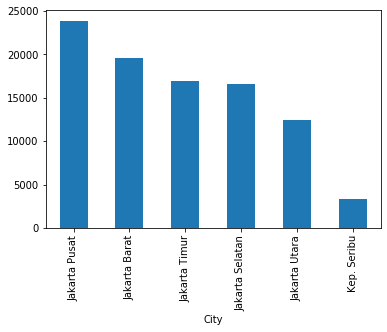

In [146]:
import matplotlib as plt

df_population.set_index('City')['Total population 2020(people/km²)'].plot.bar()

### Chart in this below is a chart of population density that is focused per district in Jakarta.

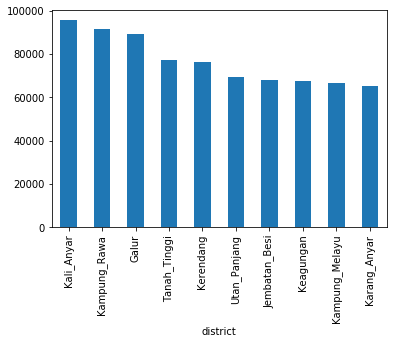

In [138]:
import matplotlib as plt

df_most_population.set_index('district')['Total population 2020 (people/km²)'].plot.bar()

## You can see the graph results that have been shown, it can be concluded that the area that most needs the distribution of mask sales is Central Jakarta (Jakarta Pusat) with the most populous population. Then 5 distrct that most need distribution of mask sales are Kali Anyar, Kampung Rawa, Galur, Tanah Tinggi and Kerendang.

In order to better understand and estimate the territories or areas that are within the administrative government of Jakarta city, we need to plot all the districts that we have downloaded from the riwayat-file-covid-19-dki-jakarta-jakartagis.hub.arcgis.com site together with their latitude and longitude values. The following line of Python code will execute the task using Folium API.

In [53]:
# Construct a map of all districts neighborhood in Jakarta 
map_jkt = folium.Map(location=[-6.2, 106.8], zoom_start=11)
for lat, lng, label in zip(df_cases['Latitude'], df_cases['Longitude'], df_cases['DISTRICT']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        location=[lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_jkt)      
map_jkt

As you can see from the above map, most of the districts are within the main outer ring roads (highway) surrounding the city and others are situated outside the main ring roads.
In order to solve in our business case, we will need to show the extent and the distribution medical devices for treatment covid-19 positive case patients within the city of Jakarta based on the number that we obtained from the government site. The following line of Python code will achieve the task and present the data in a clear visual approach.

In [54]:
# Plot a map of Covid-19 distribution in the city of Jakarta per May 28, 2020
map_covid_jkt = folium.Map(location=[-6.2, 106.8], zoom_start=11)
for lat,lon,area,size in zip(df_cases['Latitude'],df_cases['Longitude'],df_cases['DISTRICT'],df_cases['POSITIVE']):
     folium.CircleMarker(
         location=[lat, lon],
         popup=area,
         radius=size/2,
         color='r',
         opacity=0.5,
         fill=True,
         fill_opacity=0.5,
         fill_color='red',
         ).add_to(map_covid_jkt)
map_covid_jkt

This is a similar map plot that you can see from the government task force for Covid-19 cases in Jakarta. Their graph can be seen in this link: https://corona.jakarta.go.id/id/peta-persebaran. As you can see, most of the regions of Jakarta is now in the ‘RED’ zone, with the radius of the circle represent the relative extent of Covid-19 distribution in the City of Jakarta. Therefore, if someone from Bekasi wants to go to the ‘Soekarno-Hatta International Airport in the west of the city (Tangerang area), the safer way could be along the outer ring road going counter-clockwise rather than trying to pass through the city. A better presentation of the data would be to use a ‘slider’ in the map that shows the growth of the circle day by day or simply an animation that shows the daily growth of Covid-19 cases in the city. App developer might develop an App that alerts vehicles / road users that alerts that they are or are not trespassing the RED zone within the city. This App could save lives !
The next set of problem that we need to solve is to show the location of existing and approved Covid-19 testing centers (or reference hospitals) and see how well they are distributed to each other within the city and in which regions of Jakarta. The following lines of Python code will carry out the task. We will first try to plot the hosptals WITHOUT the RED circles as that might cause distraction.

In [55]:
# Construct a map of all existing Covid-19 testing hospitals in Jakarta 
map_hosp = folium.Map(location=[-6.2, 106.8], zoom_start=12)
for lat, lng, hosp in zip(df_hospital['Latitude'], df_hospital['Longitude'], df_hospital['Hospital']):
    label = folium.Popup(hosp, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        popup=hosp,
        icon=folium.Icon(color='blue', icon='header'),
        ).add_to(map_hosp)      
map_hosp

As you can see, the hospitals are quite sparsely distributed within each other except the two hospitals in the south are relatively close to each other (i.e. Fatmawati and Pasar Minggu hospitals). Let’s see how strategic they are in accomodating the extent of positive cases patients in the city. We can do this by overlaying the two data within a single map as shown in the following codes:

In [56]:
# Plot a combined map of Covid-19 distribution in the city of Jakarta & current available testing centers
map_covid_hosp_jkt = folium.Map(location=[-6.2, 106.8], zoom_start=11)
for lat,lon,area,size in zip(df_cases['Latitude'],df_cases['Longitude'],df_cases['DISTRICT'],df_cases['POSITIVE']):
     folium.CircleMarker(
         location=[lat, lon],
         popup=area,
         radius=size/2,
         color='r',
         opacity=0.5,
         fill=True,
         fill_opacity=0.5,
         fill_color='red',
         ).add_to(map_covid_hosp_jkt)
# Construct a map of all existing Covid-19 testing hospitals in Jakarta 
for lat, lng, hosp in zip(df_hospital['Latitude'], df_hospital['Longitude'], df_hospital['Hospital']):
    label = folium.Popup(hosp, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        popup=hosp,
        icon=folium.Icon(color='blue', icon='header'),
        ).add_to(map_covid_hosp_jkt)      
map_covid_hosp_jkt

## You can see from the results of the distribution of covid-19 cases and the location of hospitals, almost all hospitals are in need of a lot of medical equipment for covid-19 treatment. In addition to __Fatmawati hospital__ and the __Pasar Minggu hospital__ the distribution of the covid-19 case is not as extensive as other hospitals.

# Results and Discussion

The aim of the project is to provide information to local people who must be alerted to go out of the house from the distribution of the covid-19 case in Jakarta. Provide information on which areas most need a lot of mask distribution according to population density in an area. Then provide information on which hospitals need the most medical equipment for covid-19 treatment, maybe even additional medical personnel (doctors and nurses).

# Conclusion

This project helps mask sellers to distribute according to population density in Jakarta. Then it also helps the distribution of medical devices for corona care to hospitals that are estimated to have a large number of patients, or even helps analyze which hospitals need additional medical personnel (doctors and nurses).